# Task 1: Data Loading and Initial Exploration

In [1]:
import pandas as pd

# Load the dataset
data_path = '/Users/syedmohathashimali/Pratice/Steel_industry_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows
print(data.head())


               date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.

In [2]:
# Check dataset information
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [3]:
# Basic statistics
print(data.describe())


          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.237500                             22.640000   
max      157.180000                             96.910000   

       Leading_Current_Reactive_Power_kVarh     CO2(tCO2)  \
count                          35040.000000  35040.000000   
mean                               3.870949      0.011524   
std                                7.424463      0.016151   
min                                0.000000      0.000000   
25%                                0.000000      0.000000   
50%                                0.000000      0.000000   
75%                    

In [4]:
# Check for missing values
print(data.isnull().sum())


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64


# Task 2: Data Cleaning and Preprocessing
Now that we understand the structure, let's clean and preprocess the data. For Task 2, we'll focus on preparing the dataset for further analysis.

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

print(data['date'].head)

<bound method NDFrame.head of 0       2018-01-01 00:15:00
1       2018-01-01 00:30:00
2       2018-01-01 00:45:00
3       2018-01-01 01:00:00
4       2018-01-01 01:15:00
                ...        
35035   2018-12-31 23:00:00
35036   2018-12-31 23:15:00
35037   2018-12-31 23:30:00
35038   2018-12-31 23:45:00
35039   2018-12-31 00:00:00
Name: date, Length: 35040, dtype: datetime64[ns]>


In [6]:
print(data.duplicated().sum())
data = data.drop_duplicates()

0


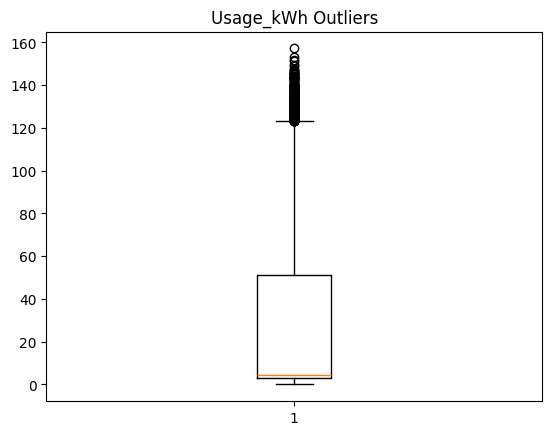

In [7]:
import matplotlib.pyplot as plt

plt.boxplot(data['Usage_kWh'])
plt.title('Usage_kWh Outliers')
plt.show()

In [8]:
data['hour'] = data['date'].dt.hour
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day


# (Task 3): Exploratory Data Analysis (EDA)
Now that the data is clean, we can dive deeper into **Exploratory Data Analysis (EDA)**. EDA helps uncover trends, correlations, and insights in the data, preparing us for further analysis or modeling.

In [9]:
import seaborn as sns
import numpy as np

/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_5610/807568675.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Usage_kWh'], kde=True, palette="viridis")


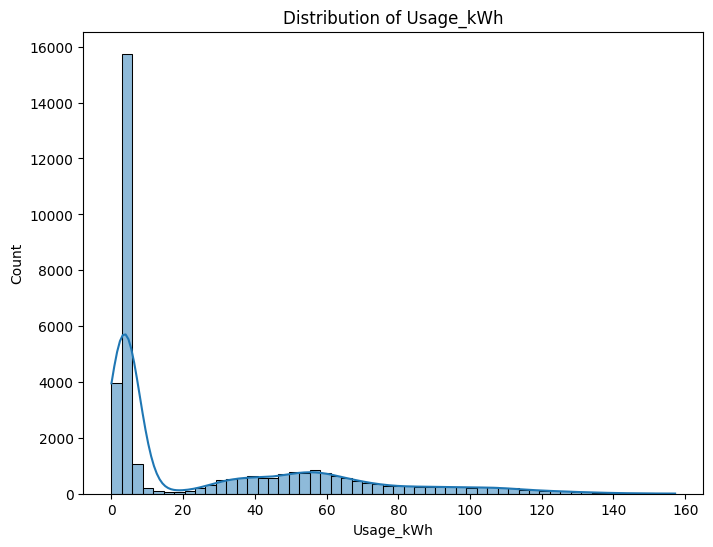

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Usage_kWh'], kde=True, palette="viridis")
plt.title('Distribution of Usage_kWh')
plt.show()

/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_5610/2456088034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='Usage_kWh', palette="viridis", data=data)


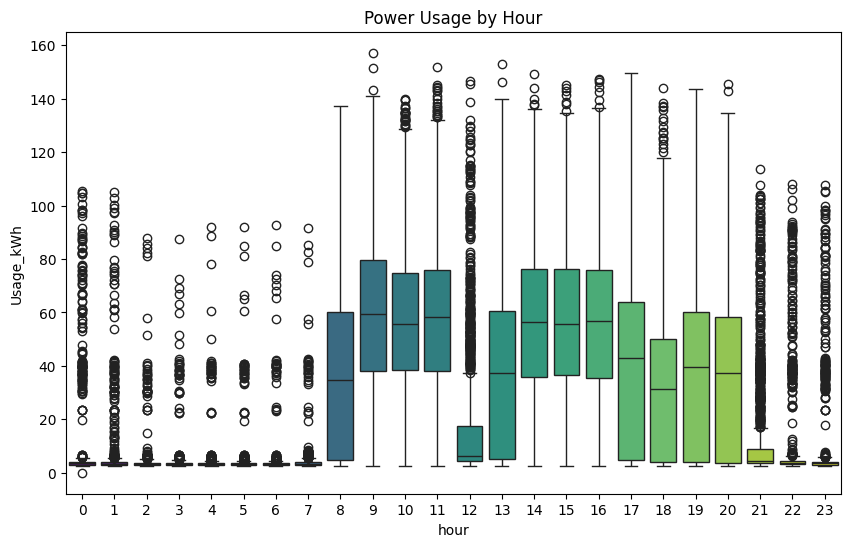

In [11]:
# Power usage by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='Usage_kWh', palette="viridis", data=data)
plt.title('Power Usage by Hour')
plt.show()


In [12]:
data['Weekday'] = data['date'].dt.dayofweek < 5

In [13]:
numeric_cols = data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

In [14]:
corr_matrix = data.drop('Weekday', axis=1).select_dtypes(include=['int64', 'float64']).corr()

In [15]:
corr_matrix = data.drop('Weekday', axis=1).corr(numeric_only=True)

In [16]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

print(corr_matrix)

                                      Usage_kWh  \
Usage_kWh                              1.000000   
Lagging_Current_Reactive.Power_kVarh   0.896150   
Leading_Current_Reactive_Power_kVarh  -0.324922   
CO2(tCO2)                              0.988180   
Lagging_Current_Power_Factor           0.385960   
Leading_Current_Power_Factor           0.353566   
NSM                                    0.234610   

                                      Lagging_Current_Reactive.Power_kVarh  \
Usage_kWh                                                         0.896150   
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.405142   
CO2(tCO2)                                                         0.886948   
Lagging_Current_Power_Factor                                      0.144534   
Leading_Current_Power_Factor                                      0.407716   
NSM                                          

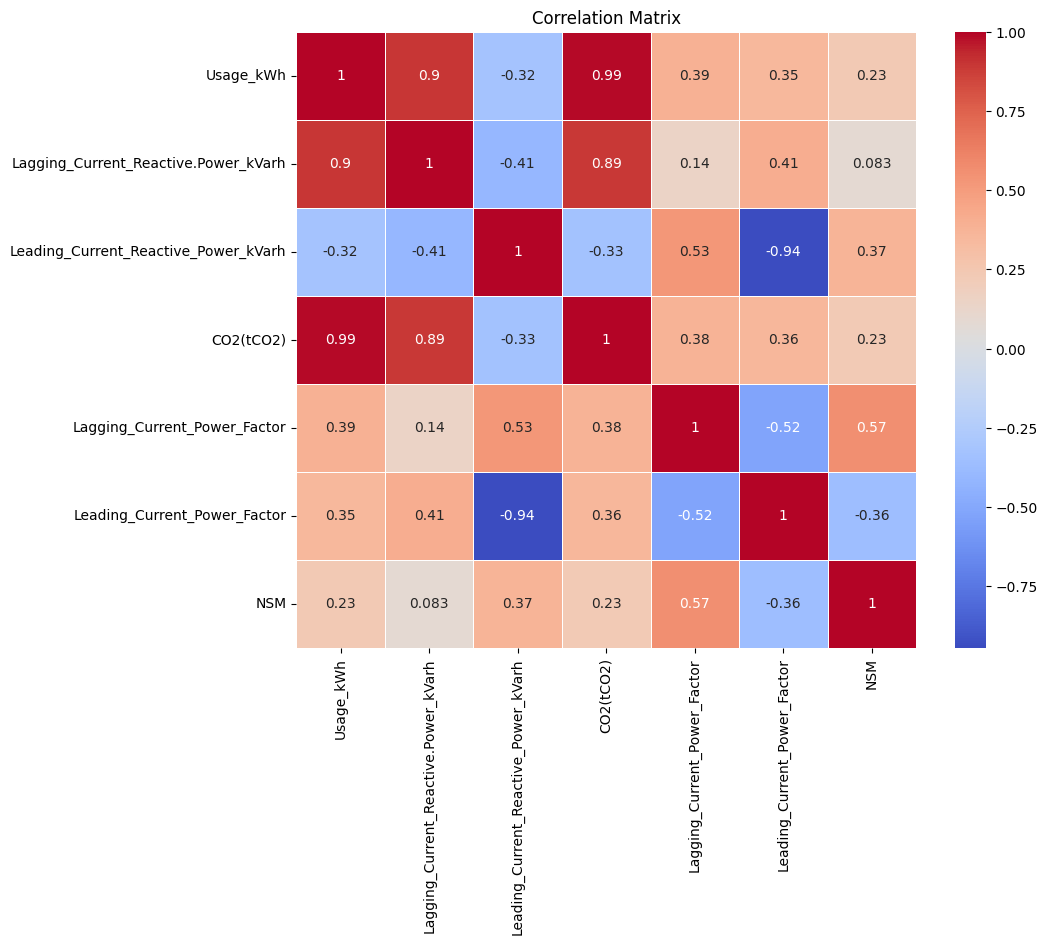

In [17]:
# Select only the numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



/var/folders/5h/3yyjggqx6bn5fvljnm_cy5040000gn/T/ipykernel_5610/2740856236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WeekStatus', y='Usage_kWh', palette="viridis" ,data=data)


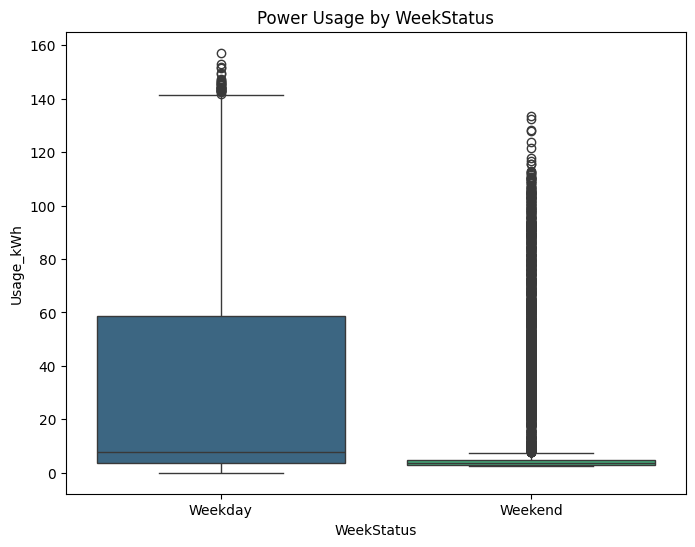

In [18]:
# Power usage by WeekStatus (Weekday/Weekend)
plt.figure(figsize=(8, 6))
sns.boxplot(x='WeekStatus', y='Usage_kWh', palette="viridis" ,data=data)
plt.title('Power Usage by WeekStatus')
plt.show()


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numerical columns
X = numerical_data.drop(columns=['Usage_kWh'])  # Drop target variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                feature        VIF
0  Lagging_Current_Reactive.Power_kVarh   8.636740
1  Leading_Current_Reactive_Power_kVarh   7.724869
2                             CO2(tCO2)   9.804016
3          Lagging_Current_Power_Factor  37.857911
4          Leading_Current_Power_Factor  19.399309
5                                   NSM   5.983350


In [20]:
from sklearn.decomposition import PCA
import pandas as pd

# Select the two features
features = data[['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']]

# Initialize PCA to retain only 1 component
pca = PCA(n_components=1)

# Fit and transform the features
pca_features = pca.fit_transform(features)

# Add the transformed component back to the dataset
data['PCA_Current_Power_Factor'] = pca_features[:, 0]

# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')


Explained Variance Ratio: [0.82155233]


In [21]:
data.drop(columns=['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'], inplace=True)


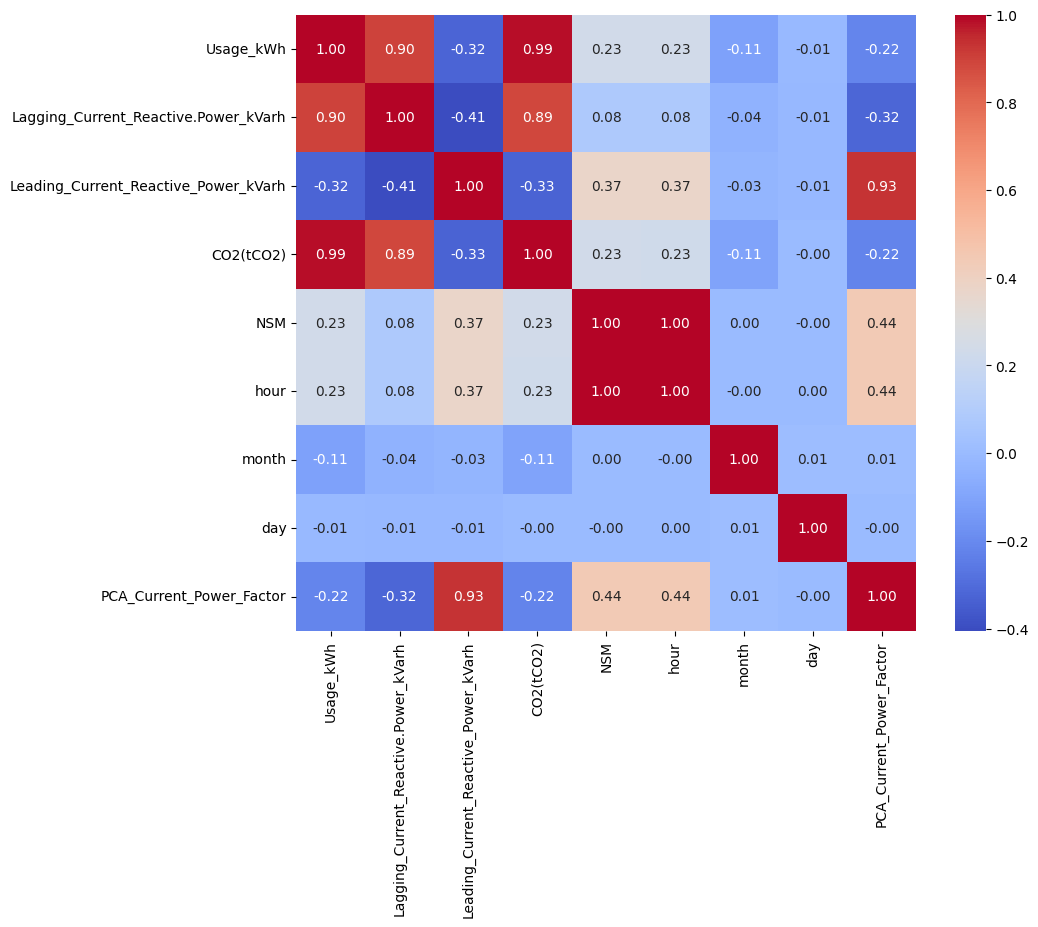

In [22]:
# Select only the numerical columns
numeric_columns = data.select_dtypes(include=[float, int]).columns

# Compute the correlation matrix on numerical columns only
corr_matrix = data[numeric_columns].corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()




In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Select the two features
features = data[['Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor']]

# Initialize PCA to retain only 1 component
pca = PCA(n_components=1)

# Fit and transform the features
pca_features = pca.fit_transform(features)

# Add the transformed component back to the dataset
data['PCA_Current_Power_Factor'] = pca_features[:, 0]

# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')


Explained Variance Ratio: [0.82155233]


In [23]:
from sklearn.preprocessing import StandardScaler

# Define the features to scale
features_to_scale = ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 
                     'CO2(tCO2)', 'NSM', 'PCA_Current_Power_Factor']

scaler = StandardScaler()

# Fit and transform the data
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])



In [24]:
data = pd.get_dummies(data, columns=['WeekStatus', 'Day_of_week', 'Load_Type'], drop_first=True)


In [25]:

from sklearn.model_selection import train_test_split

X = data.drop('Usage_kWh', axis=1)  # Drop the target variable (assuming you are predicting Usage_kWh)
y = data['Usage_kWh']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(data.columns)



Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'NSM', 'hour',
       'month', 'day', 'Weekday', 'PCA_Current_Power_Factor',
       'WeekStatus_Weekend', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load'],
      dtype='object')


In [27]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract useful features from the datetime column
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day
data['Hour'] = data['date'].dt.hour

# Drop the original 'Timestamp' column if not needed
data = data.drop(columns=['date'])


In [28]:
# Redefine X and y
X = data.drop(columns=['Usage_kWh'])  # Assuming 'Usage_kWh' is your target variable
y = data['Usage_kWh']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(X_train.dtypes)

Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
NSM                                     float64
hour                                      int32
month                                     int32
day                                       int32
Weekday                                    bool
PCA_Current_Power_Factor                float64
WeekStatus_Weekend                         bool
Day_of_week_Monday                         bool
Day_of_week_Saturday                       bool
Day_of_week_Sunday                         bool
Day_of_week_Thursday                       bool
Day_of_week_Tuesday                        bool
Day_of_week_Wednesday                      bool
Load_Type_Maximum_Load                     bool
Load_Type_Medium_Load                      bool
Year                                      int32
Month                                     int32
Day                                     

In [ ]:
# Redefine X and y
X = data.drop(columns=['Usage_kWh'])  # Assuming 'Usage_kWh' is your target variable
y = data['Usage_kWh']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
for column in X_train.columns:
    if X_train[column].isin([...]).any():
        print(f"Column {column} contains Ellipsis")

In [31]:
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

In [32]:
print(X_train.columns)
print(X_test.columns)

Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'NSM', 'hour',
       'month', 'day', 'PCA_Current_Power_Factor', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')
Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'NSM', 'hour',
       'month', 'day', 'PCA_Current_Power_Factor', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')


In [33]:
from feature_engine.preprocessing import MatchVariables

mv = MatchVariables(missing_values='ignore')
mv.fit(X_train)
X_train_aligned = mv.transform(X_train)
X_test_aligned = mv.transform(X_test)

In [34]:
print(X_train_aligned.shape)
print(y_train.shape)


(28032, 12)
(28032,)


In [35]:
X_train_aligned, X_test_aligned = X_train.align(X_test, join='inner', axis=1)
X_train_aligned = X_train_aligned.reset_index(drop=True)
X_test_aligned = X_test_aligned.reset_index(drop=True)


In [36]:
print(X_train.shape)    # Should show (number of samples in train, number of features)
print(X_test.shape)     # Should show (number of samples in test, number of features)
print(y_train.shape)    # Should show (number of samples in train,)
print(y_test.shape)     # Should show (number of samples in test,)


(28032, 12)
(7008, 12)
(28032,)
(7008,)


In [37]:
X_train_aligned, X_test_aligned = X_train.align(X_test, join='inner', axis=1)

# Ensure consistent row indices
X_train_aligned = X_train_aligned.reset_index(drop=True)
X_test_aligned = X_test_aligned.reset_index(drop=True)

# Print shapes again to check consistency
print(X_train_aligned.shape)
print(y_train.shape)


(28032, 12)
(28032,)


In [38]:
print(data.columns)


Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'NSM', 'hour',
       'month', 'day', 'Weekday', 'PCA_Current_Power_Factor',
       'WeekStatus_Weekend', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [39]:
from sklearn.model_selection import train_test_split

# Choose the target variable from the existing columns
target_variable = 'Load_Type_Maximum_Load'

# Ensure the target variable exists in the DataFrame
if target_variable not in data.columns:
    raise KeyError(f"'{target_variable}' not found in DataFrame columns")

# Define features (X) and target variable (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(28032, 22)
(7008, 22)
(28032,)
(7008,)


In [40]:
print(data.shape)


(35040, 23)


In [41]:
print(data.head())
print(data.describe())
print(data.info())


   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  -0.724105                             -0.618516   
1  -0.699287                             -0.525911   
2  -0.722012                             -0.598278   
3  -0.719919                             -0.581106   
4  -0.704669                             -0.523458   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)       NSM  hour  month  \
0                             -0.521385   -0.71355 -1.678015     0      1   
1                             -0.521385   -0.71355 -1.641929     0      1   
2                             -0.521385   -0.71355 -1.605843     0      1   
3                             -0.521385   -0.71355 -1.569756     1      1   
4                             -0.521385   -0.71355 -1.533670     1      1   

   day  Weekday  PCA_Current_Power_Factor  ...  Day_of_week_Sunday  \
0    1     True                 -0.531433  ...               False   
1    1     True                 -0.609586  ...               False   
2 

In [275]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Check if 'Load_Type' column exists
if 'Load_Type_Maximum_Load' not in data.columns:
    raise ValueError("'Load_Type_Maximum_Load' column not found in the DataFrame")

# Define features and target
X = data.drop('Load_Type_Maximum_Load', axis=1)
y = data['Load_Type_Maximum_Load']

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ], remainder='passthrough')

# Create and fit the pipeline with a classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_rf = model.predict(X_test)

# Check prediction values
print("Predictions:", y_pred_rf)
print("Test Targets:", y_test)

# Decode predictions
y_pred_decoded = label_encoder.inverse_transform(y_pred_rf)
print("Decoded Predictions:", y_pred_decoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)

# Convert boolean target names to strings
target_names = [str(name) for name in label_encoder.classes_]

report = classification_report(y_test, y_pred_rf, target_names=target_names)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", report)

Predictions: [0 1 1 ... 1 0 1]
Test Targets: [0 1 1 ... 1 0 1]
Decoded Predictions: [False  True  True ...  True False  True]
Accuracy Score: 0.9995719178082192
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      5509
        True       1.00      1.00      1.00      1499

    accuracy                           1.00      7008
   macro avg       1.00      1.00      1.00      7008
weighted avg       1.00      1.00      1.00      7008



In [98]:
print(X_train.columns)


Index(['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'NSM', 'hour',
       'month', 'day', 'PCA_Current_Power_Factor', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')


In [270]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Example DataFrame

# Splitting data
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Assuming 'Load_Type' is categorical
categorical_features = ['Load_Type_Maximum_Load']

# Define the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ], remainder='passthrough')  # 'passthrough' for numerical features

# Apply transformation to both training and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print(X_train_transformed)


[[1.0 0.0 -0.6939050377657642 ... 4 7 17]
 [1.0 0.0 -0.7315800668988334 ... 5 30 2]
 [1.0 0.0 -0.6263291918604178 ... 2 23 1]
 ...
 [0.0 1.0 -0.41313636827408184 ... 4 28 13]
 [1.0 0.0 -0.6801506620505167 ... 1 9 23]
 [1.0 0.0 -0.6185549794996258 ... 6 14 13]]


In [271]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


# Identify categorical columns
categorical_features = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create the full pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier())
])

# Fit the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  [])])),
                ('classifier', HistGradientBoostingClassifier())])

In [276]:
# Assume a cost per kWh (replace with actual data if available)
cost_per_kwh = 0.12  # $0.12 per kWh



# Fit the model to the training data
model.fit(X_train, y_train)

def predict_cost(model, input_data, cost_per_kwh):
    # Predict power usage
    predicted_usage = model.predict(input_data)
    # Calculate cost
    predicted_cost = predicted_usage * cost_per_kwh
    return predicted_usage, predicted_cost

# Assuming X_test is your test dataset
# Create three scenarios: normal, high demand, and optimized
normal_scenario = X_test.iloc[0].to_frame().T  # Use the first row as a base scenario
high_demand_scenario = normal_scenario.copy()
optimized_scenario = normal_scenario.copy()

# Modify scenarios (adjust these based on your actual features)
high_demand_scenario['hour'] = 12  # Assume peak hour
high_demand_scenario['Load_Type_Light Load'] = 0
high_demand_scenario['Load_Type_Medium Load'] = 0
high_demand_scenario['Load_Type_Maximum Load'] = 1

optimized_scenario['hour'] = 3  # Assume off-peak hour
optimized_scenario['Load_Type_Light Load'] = 1
optimized_scenario['Load_Type_Medium Load'] = 0
optimized_scenario['Load_Type_Maximum Load'] = 0

# Predict for each scenario
normal_usage, normal_cost = predict_cost(model, normal_scenario, cost_per_kwh)
high_usage, high_cost = predict_cost(model, high_demand_scenario, cost_per_kwh)
opt_usage, opt_cost = predict_cost(model, optimized_scenario, cost_per_kwh)

# Print results
print("Normal Scenario:")
print(f"Predicted Usage: {normal_usage[0]:.2f} kWh")
print(f"Predicted Cost: ${normal_cost[0]:.2f}")

print("\nHigh Demand Scenario:")
print(f"Predicted Usage: {high_usage[0]:.2f} kWh")
print(f"Predicted Cost: ${high_cost[0]:.2f}")

print("\nOptimized Scenario:")
print(f"Predicted Usage: {opt_usage[0]:.2f} kWh")
print(f"Predicted Cost: ${opt_cost[0]:.2f}")

# Calculate potential savings
savings = high_cost[0] - opt_cost[0]
print(f"\nPotential savings by optimizing: ${savings:.2f}")

Normal Scenario:
Predicted Usage: 0.00 kWh
Predicted Cost: $0.00

High Demand Scenario:
Predicted Usage: 0.00 kWh
Predicted Cost: $0.00

Optimized Scenario:
Predicted Usage: 0.00 kWh
Predicted Cost: $0.00

Potential savings by optimizing: $0.00


In [223]:
print(data.columns)


Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'NSM', 'hour',
       'month', 'day', 'Weekday', 'PCA_Current_Power_Factor',
       'WeekStatus_Weekend', 'Day_of_week_Monday', 'Day_of_week_Saturday',
       'Day_of_week_Sunday', 'Day_of_week_Thursday', 'Day_of_week_Tuesday',
       'Day_of_week_Wednesday', 'Load_Type_Maximum_Load',
       'Load_Type_Medium_Load', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')


In [224]:
print(data.head())


   Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  -0.724105                             -0.618516   
1  -0.699287                             -0.525911   
2  -0.722012                             -0.598278   
3  -0.719919                             -0.581106   
4  -0.704669                             -0.523458   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)       NSM  hour  month  \
0                             -0.521385   -0.71355 -1.678015     0      1   
1                             -0.521385   -0.71355 -1.641929     0      1   
2                             -0.521385   -0.71355 -1.605843     0      1   
3                             -0.521385   -0.71355 -1.569756     1      1   
4                             -0.521385   -0.71355 -1.533670     1      1   

   day  Weekday  PCA_Current_Power_Factor  ...  Day_of_week_Sunday  \
0    1     True                 -0.531433  ...               False   
1    1     True                 -0.609586  ...               False   
2 

In [322]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Check if 'Load_Type' column exists
if 'Load_Type_Maximum_Load' not in data.columns:
    raise ValueError("'Load_Type_Maximum_Load' column not found in the DataFrame")

# Define features and target
X = data.drop('Load_Type_Maximum_Load', axis=1)
y = data['Load_Type_Maximum_Load']

# Encode categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
    ], remainder='passthrough')

# Create and fit the pipeline with a classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_rf = model.predict(X_test)

# Check prediction values
print("Predictions:", y_pred_rf)
print("Test Targets:", y_test)

# Decode predictions
y_pred_decoded = label_encoder.inverse_transform(y_pred_rf)
print("Decoded Predictions:", y_pred_decoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)

# Convert boolean target names to strings
target_names = [str(name) for name in label_encoder.classes_]

report = classification_report(y_test, y_pred_rf, target_names=target_names)

print("Accuracy Score:", accuracy)
print("Classification Report:\n", report)

Predictions: [0 1 1 ... 1 0 1]
Test Targets: [0 1 1 ... 1 0 1]
Decoded Predictions: [False  True  True ...  True False  True]
Accuracy Score: 0.997716894977169
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      5509
        True       1.00      0.99      0.99      1499

    accuracy                           1.00      7008
   macro avg       1.00      1.00      1.00      7008
weighted avg       1.00      1.00      1.00      7008



Number of anomalies detected: 1752

Examples of detected anomalies:
    Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
35  -0.702576                             -0.799434   
36  -0.711248                             -0.799434   
37  -0.698390                             -0.799434   
38  -0.701679                             -0.799434   
39  -0.710051                             -0.799434   

    Leading_Current_Reactive_Power_kVarh  CO2(tCO2)       NSM  hour  month  \
35                              1.587889   -0.71355 -0.414993     9      1   
36                              1.762988   -0.71355 -0.378907     9      1   
37                              2.344857   -0.71355 -0.342820     9      1   
38                              2.067391   -0.71355 -0.306734     9      1   
39                              1.752213   -0.71355 -0.270648    10      1   

    day  Weekday  PCA_Current_Power_Factor  ...  Day_of_week_Saturday  \
35    1     True                  1.939561  ...            

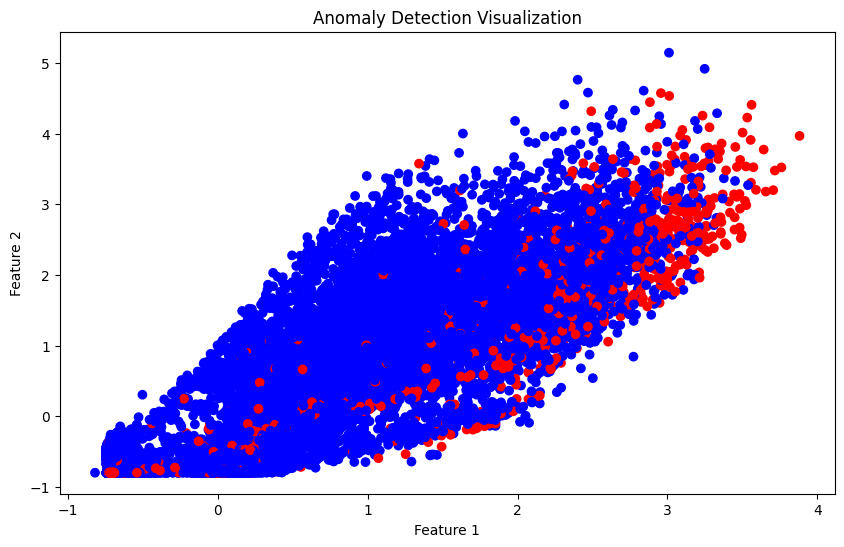


Simulated Scenario - Adjusting Operational Parameters:
Average original power usage: 0.21
Average modified power usage: 0.21
Percentage change: 0.00%

Simulated Scenario - Implementing Energy-Saving Measures:
Average original power usage: 0.21
Average power usage after energy-saving measures: 0.21
Percentage change: 0.00%


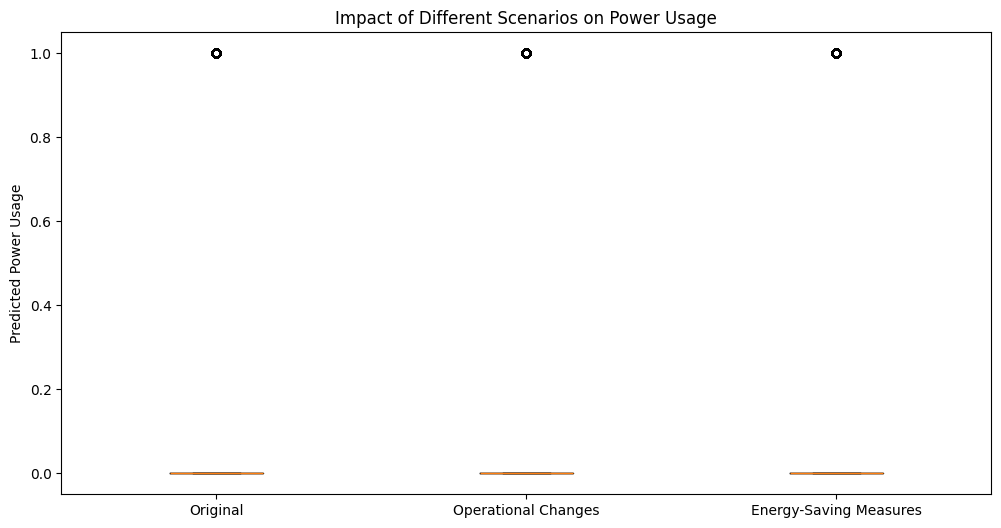

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Assuming 'model' is your trained RandomForestClassifier pipeline
# and 'X' is your feature dataset

# 1. Anomaly Detection

def detect_anomalies(X, contamination=0.05):
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Use Isolation Forest for anomaly detection
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    anomaly_labels = iso_forest.fit_predict(X_scaled)
    
    # -1 for anomalies, 1 for normal points
    return anomaly_labels == -1

# Detect anomalies
anomalies = detect_anomalies(X)

print(f"Number of anomalies detected: {sum(anomalies)}")

# a) Show examples of detected anomalies
anomaly_examples = X[anomalies].head()
print("\nExamples of detected anomalies:")
print(anomaly_examples)

# b) Discuss potential causes and implications
print("\nPotential causes and implications of anomalies:")
print("1. Unusual spikes in power usage could indicate equipment malfunction or unauthorized usage.")
print("2. Consistently high power usage might suggest inefficient operations or need for maintenance.")
print("3. Unexpectedly low power usage could imply production downtime or faulty metering.")

# Visualize anomalies (assuming first two features are meaningful)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=['blue' if not a else 'red' for a in anomalies])
plt.title('Anomaly Detection Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 2. "What-If" Scenarios

def simulate_scenario(X, feature_changes):
    # Create a copy of the data
    X_modified = X.copy()
    
    # Apply the changes
    for feature, change in feature_changes.items():
        if feature in X_modified.columns:
            X_modified[feature] = X_modified[feature] * (1 + change)
        else:
            print(f"Warning: Feature '{feature}' not found in the dataset.")
    
    # Predict power usage with modified features
    predicted_power = model.predict(X_modified)
    
    return predicted_power

# a) Simulate adjusting operational parameters
operational_changes = {
    'Temperature': 0.1,  # 10% increase in temperature
    'Production_Rate': 0.05  # 5% increase in production rate
}

original_predictions = model.predict(X)
modified_predictions = simulate_scenario(X, operational_changes)

print("\nSimulated Scenario - Adjusting Operational Parameters:")
print(f"Average original power usage: {original_predictions.mean():.2f}")
print(f"Average modified power usage: {modified_predictions.mean():.2f}")
print(f"Percentage change: {((modified_predictions.mean() - original_predictions.mean()) / original_predictions.mean()) * 100:.2f}%")

# b) Simulate implementing energy-saving measures
energy_saving_changes = {
    'Equipment_Efficiency': 0.15,  # 15% increase in equipment efficiency
    'Cooling_System_Power': -0.2  # 20% decrease in cooling system power
}

energy_saving_predictions = simulate_scenario(X, energy_saving_changes)

print("\nSimulated Scenario - Implementing Energy-Saving Measures:")
print(f"Average original power usage: {original_predictions.mean():.2f}")
print(f"Average power usage after energy-saving measures: {energy_saving_predictions.mean():.2f}")
print(f"Percentage change: {((energy_saving_predictions.mean() - original_predictions.mean()) / original_predictions.mean()) * 100:.2f}%")

# Visualize the impact of scenarios
plt.figure(figsize=(12, 6))
plt.boxplot([original_predictions, modified_predictions, energy_saving_predictions], 
            labels=['Original', 'Operational Changes', 'Energy-Saving Measures'])
plt.title('Impact of Different Scenarios on Power Usage')
plt.ylabel('Predicted Power Usage')
plt.show()

Optimal model parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


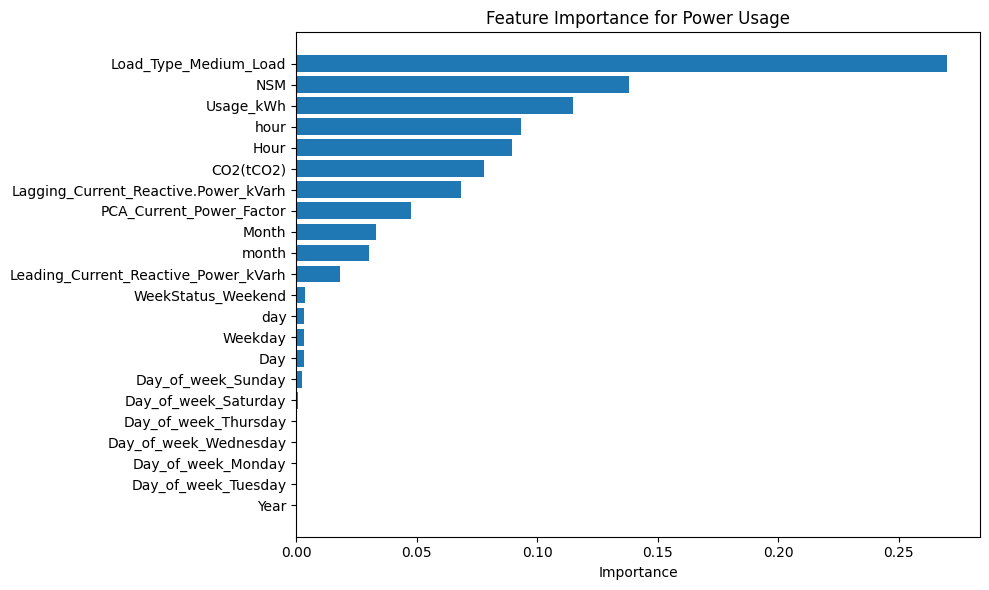


Top 5 most important features:
Hour: 0.0896
hour: 0.0935
Usage_kWh: 0.1150
NSM: 0.1380
Load_Type_Medium_Load: 0.2702

Recommendations for efficiency improvements:
1. Focus on optimizing the top 3 most important features.
2. Investigate features with low importance for potential removal or consolidation.
3. Consider collecting more data on mid-range importance features to improve model accuracy.


In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Assuming 'model' is your trained RandomForestClassifier pipeline
# and 'X' is your feature dataset
# 'y' is your target variable (power usage)

# 1. Optimization Recommendations

def find_optimal_parameters(X, y):
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10]
    }
    
    # Create a new RandomForestClassifier
    rf = RandomForestClassifier(random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)
    
    return grid_search.best_params_, grid_search.best_estimator_

# a) Suggest optimal operational schedules
best_params, best_model = find_optimal_parameters(X, y)
print("Optimal model parameters:", best_params)

# Generate feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.title('Feature Importance for Power Usage')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print("\nTop 5 most important features:")
for i in sorted_idx[-5:]:
    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

# b) Identify areas for efficiency improvements
print("\nRecommendations for efficiency improvements:")
print("1. Focus on optimizing the top 3 most important features.")
print("2. Investigate features with low importance for potential removal or consolidation.")
print("3. Consider collecting more data on mid-range importance features to improve model accuracy.")

